In [43]:
# !pip install -q hvplot

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [45]:
data = pd.read_csv("results.csv",encoding='windows-1254')

In [46]:
data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [47]:
data=data.iloc[8904:11113]

In [48]:
data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8904,2016-17,2016-08-13T00:00:00Z,Burnley,Swansea,0,1,A,0.0,0.0,D,...,3.0,9.0,7.0,4.0,10.0,14.0,3.0,2.0,0.0,0.0
8905,2016-17,2016-08-13T00:00:00Z,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,4.0,3.0,3.0,6.0,12.0,15.0,2.0,2.0,0.0,0.0
8906,2016-17,2016-08-13T00:00:00Z,Everton,Tottenham,1,1,D,1.0,0.0,H,...,6.0,4.0,5.0,6.0,10.0,14.0,0.0,0.0,0.0,0.0
8907,2016-17,2016-08-13T00:00:00Z,Hull,Leicester,2,1,H,1.0,0.0,H,...,5.0,5.0,5.0,3.0,8.0,17.0,2.0,2.0,0.0,0.0
8908,2016-17,2016-08-13T00:00:00Z,Man City,Sunderland,2,1,H,1.0,0.0,H,...,4.0,3.0,9.0,6.0,11.0,14.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


(16.5, -0.5)

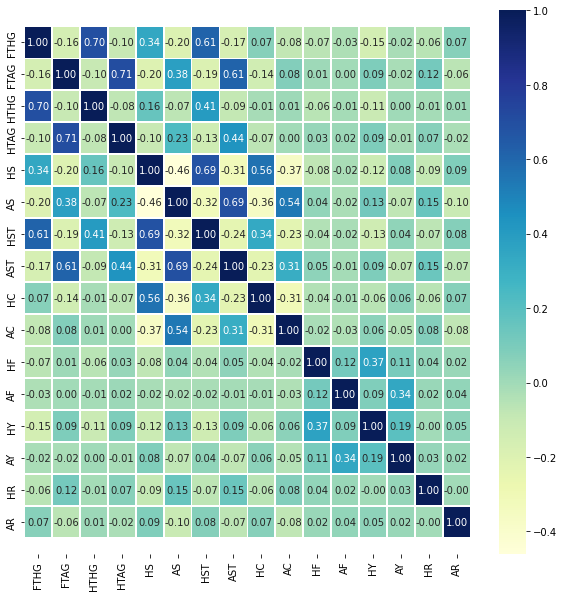

In [49]:
corrleation_matrix=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corrleation_matrix,annot=True,linewidths=0.8,fmt=".2f",cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

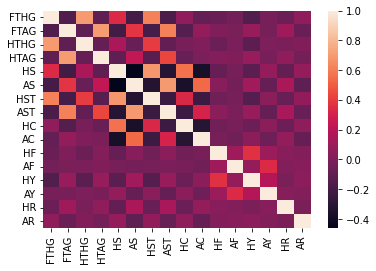

In [50]:
df = pd.DataFrame(data)

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

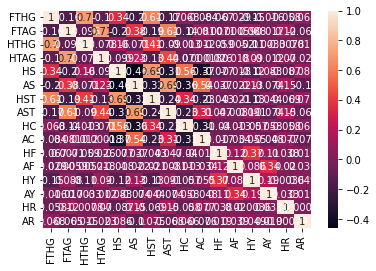

In [51]:
df = pd.DataFrame(data)

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Text(0, 0.5, 'Index')

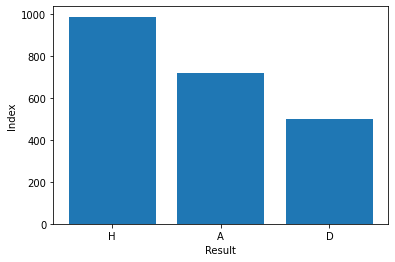

In [52]:
fig,ax=plt.subplots()
Full_Time_Results=data['FTR'].value_counts()

Index=Full_Time_Results.index
Resuls=Full_Time_Results.values

ax.bar(Index,Resuls)
ax.set_xlabel('Result')
ax.set_ylabel('Index')

Text(0, 0.5, 'Matches')

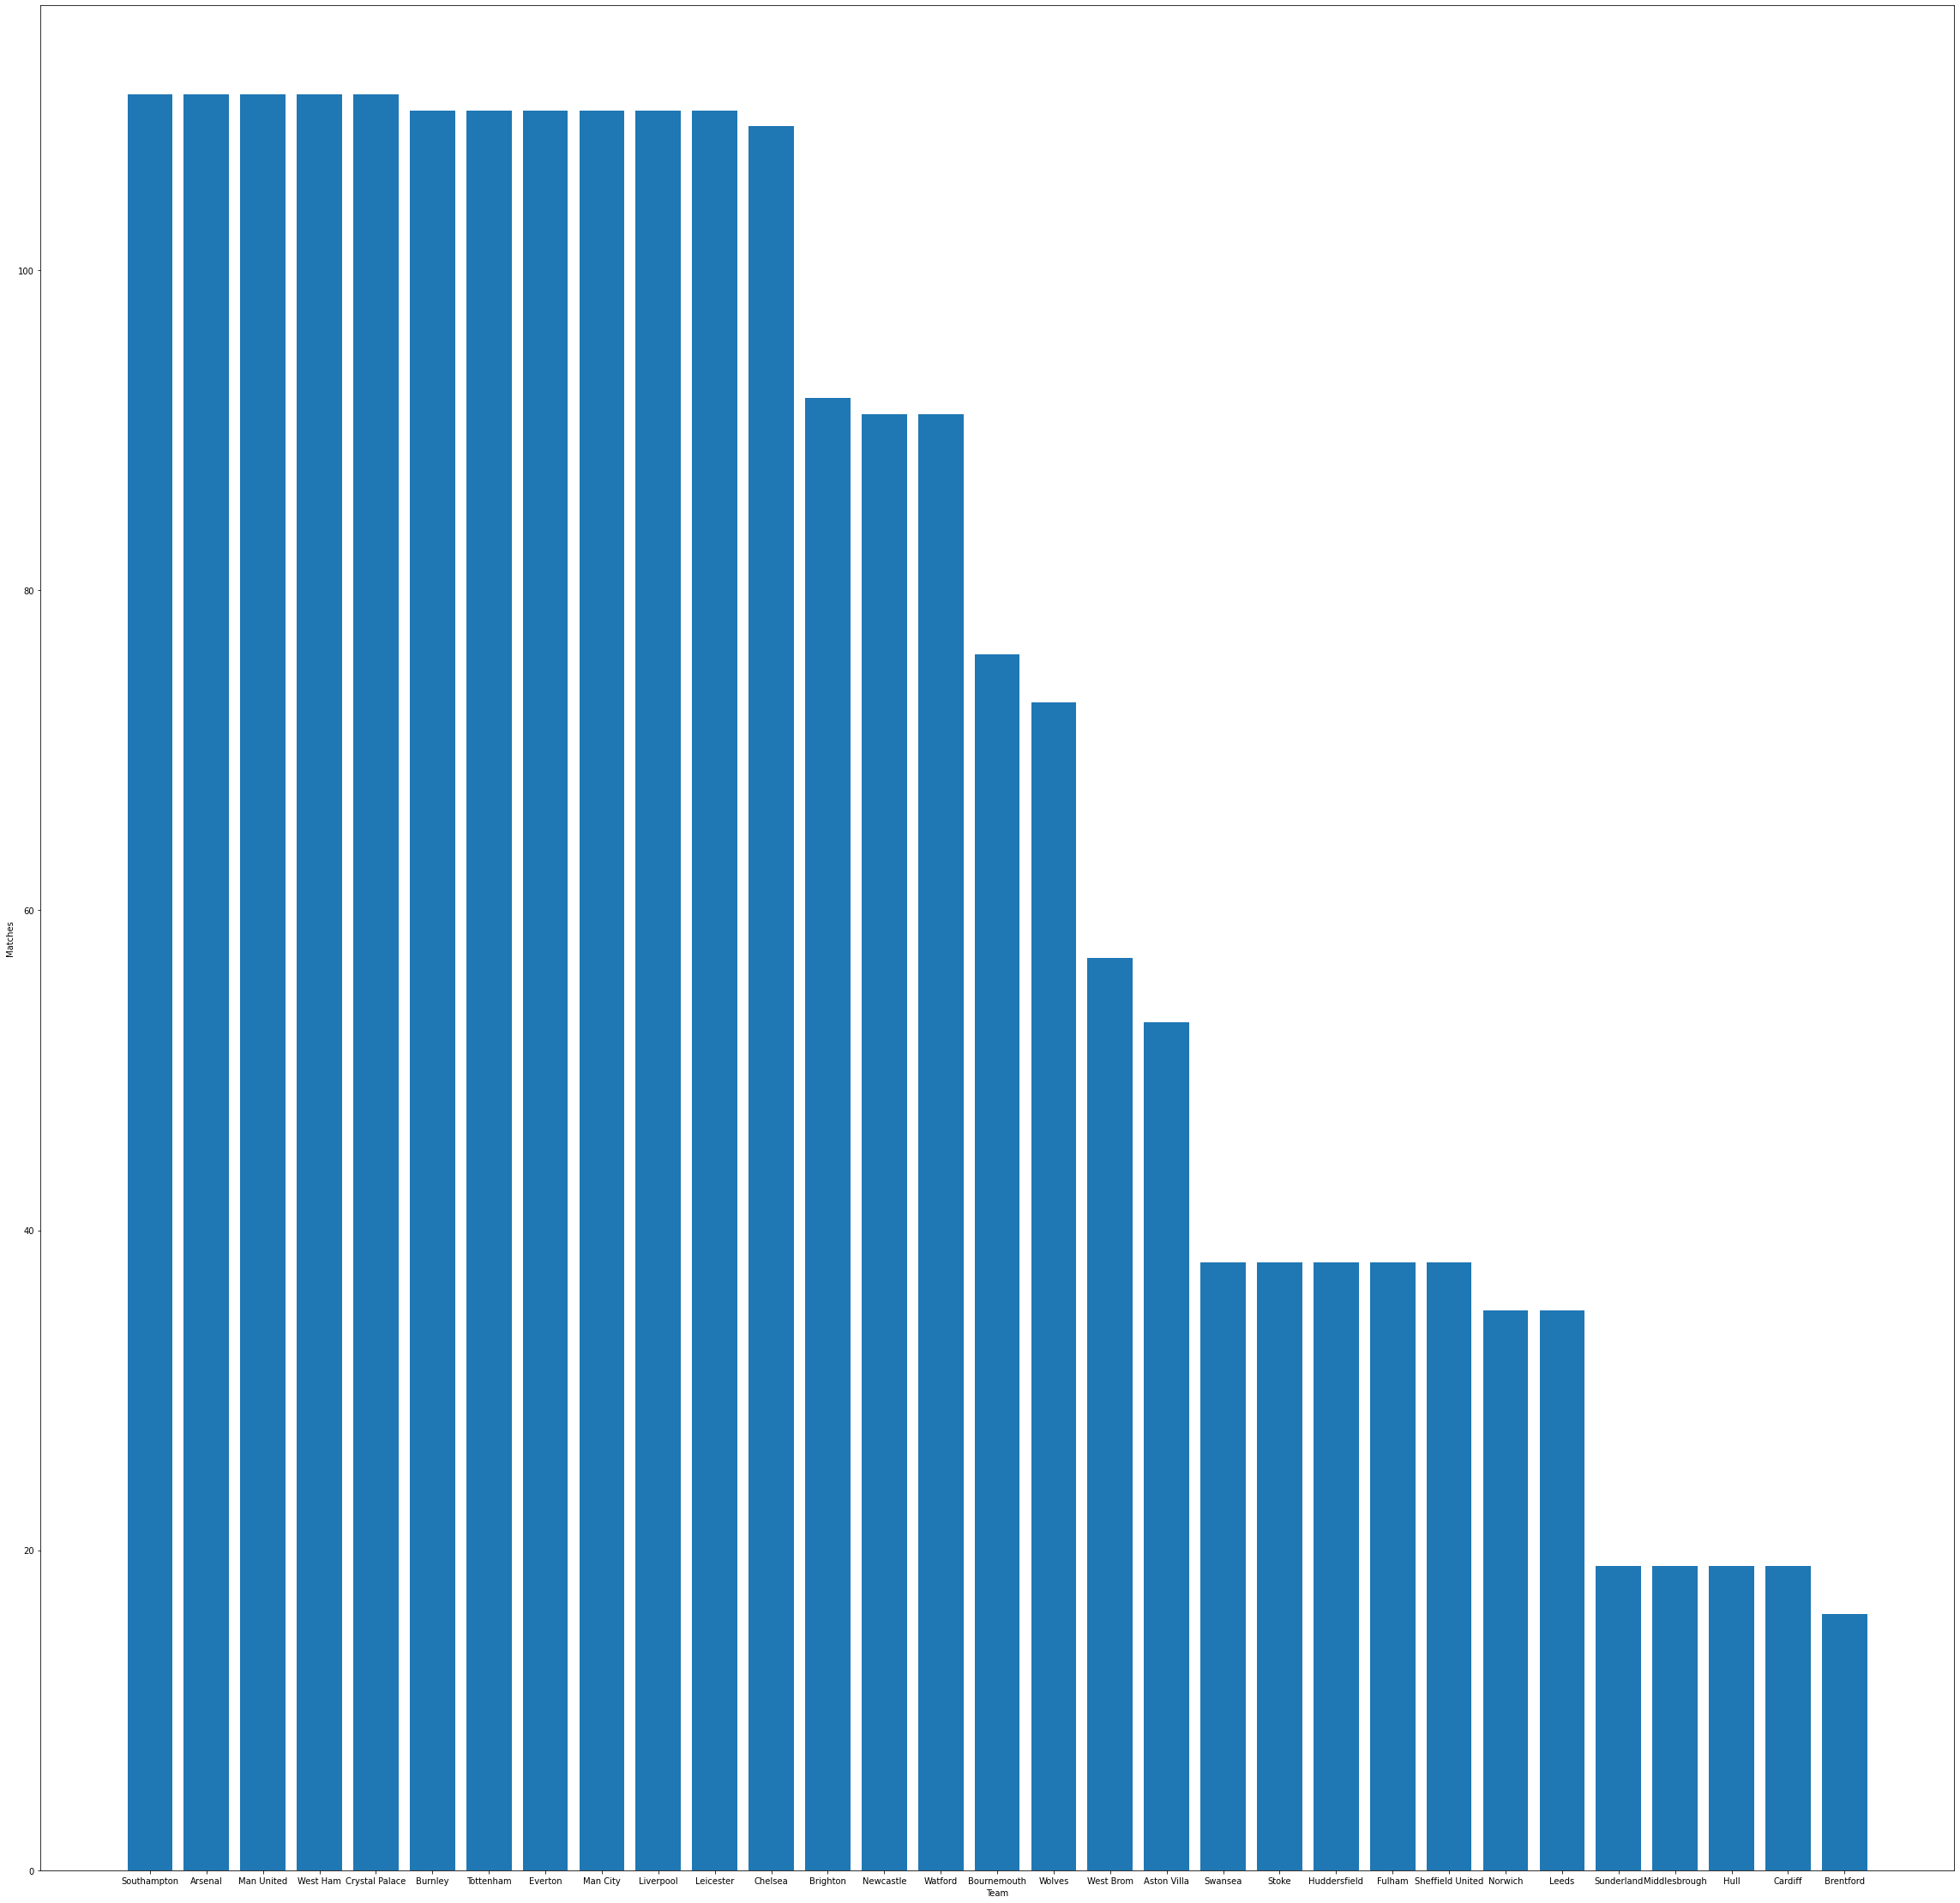

In [53]:
fig,ax=plt.subplots(figsize=(40, 40))
Team_home=data['HomeTeam'].value_counts()
Team_away=data['AwayTeam'].value_counts()

Index_home=Team_home.index
Resuls_home=Team_home.values


Index_away=Team_away.index
Resuls_away=Team_away.values


ax.bar(Index_home,Resuls_home)

#ax.set_xlabel('Result')
#ax.set_ylabel('Index')
#plt.hist(Team_home,bins=30)
#plt.hist(Team_away,bins=30)

ax.set_xlabel("Team")
ax.set_ylabel("Matches")


Text(0, 0.5, 'Matches')

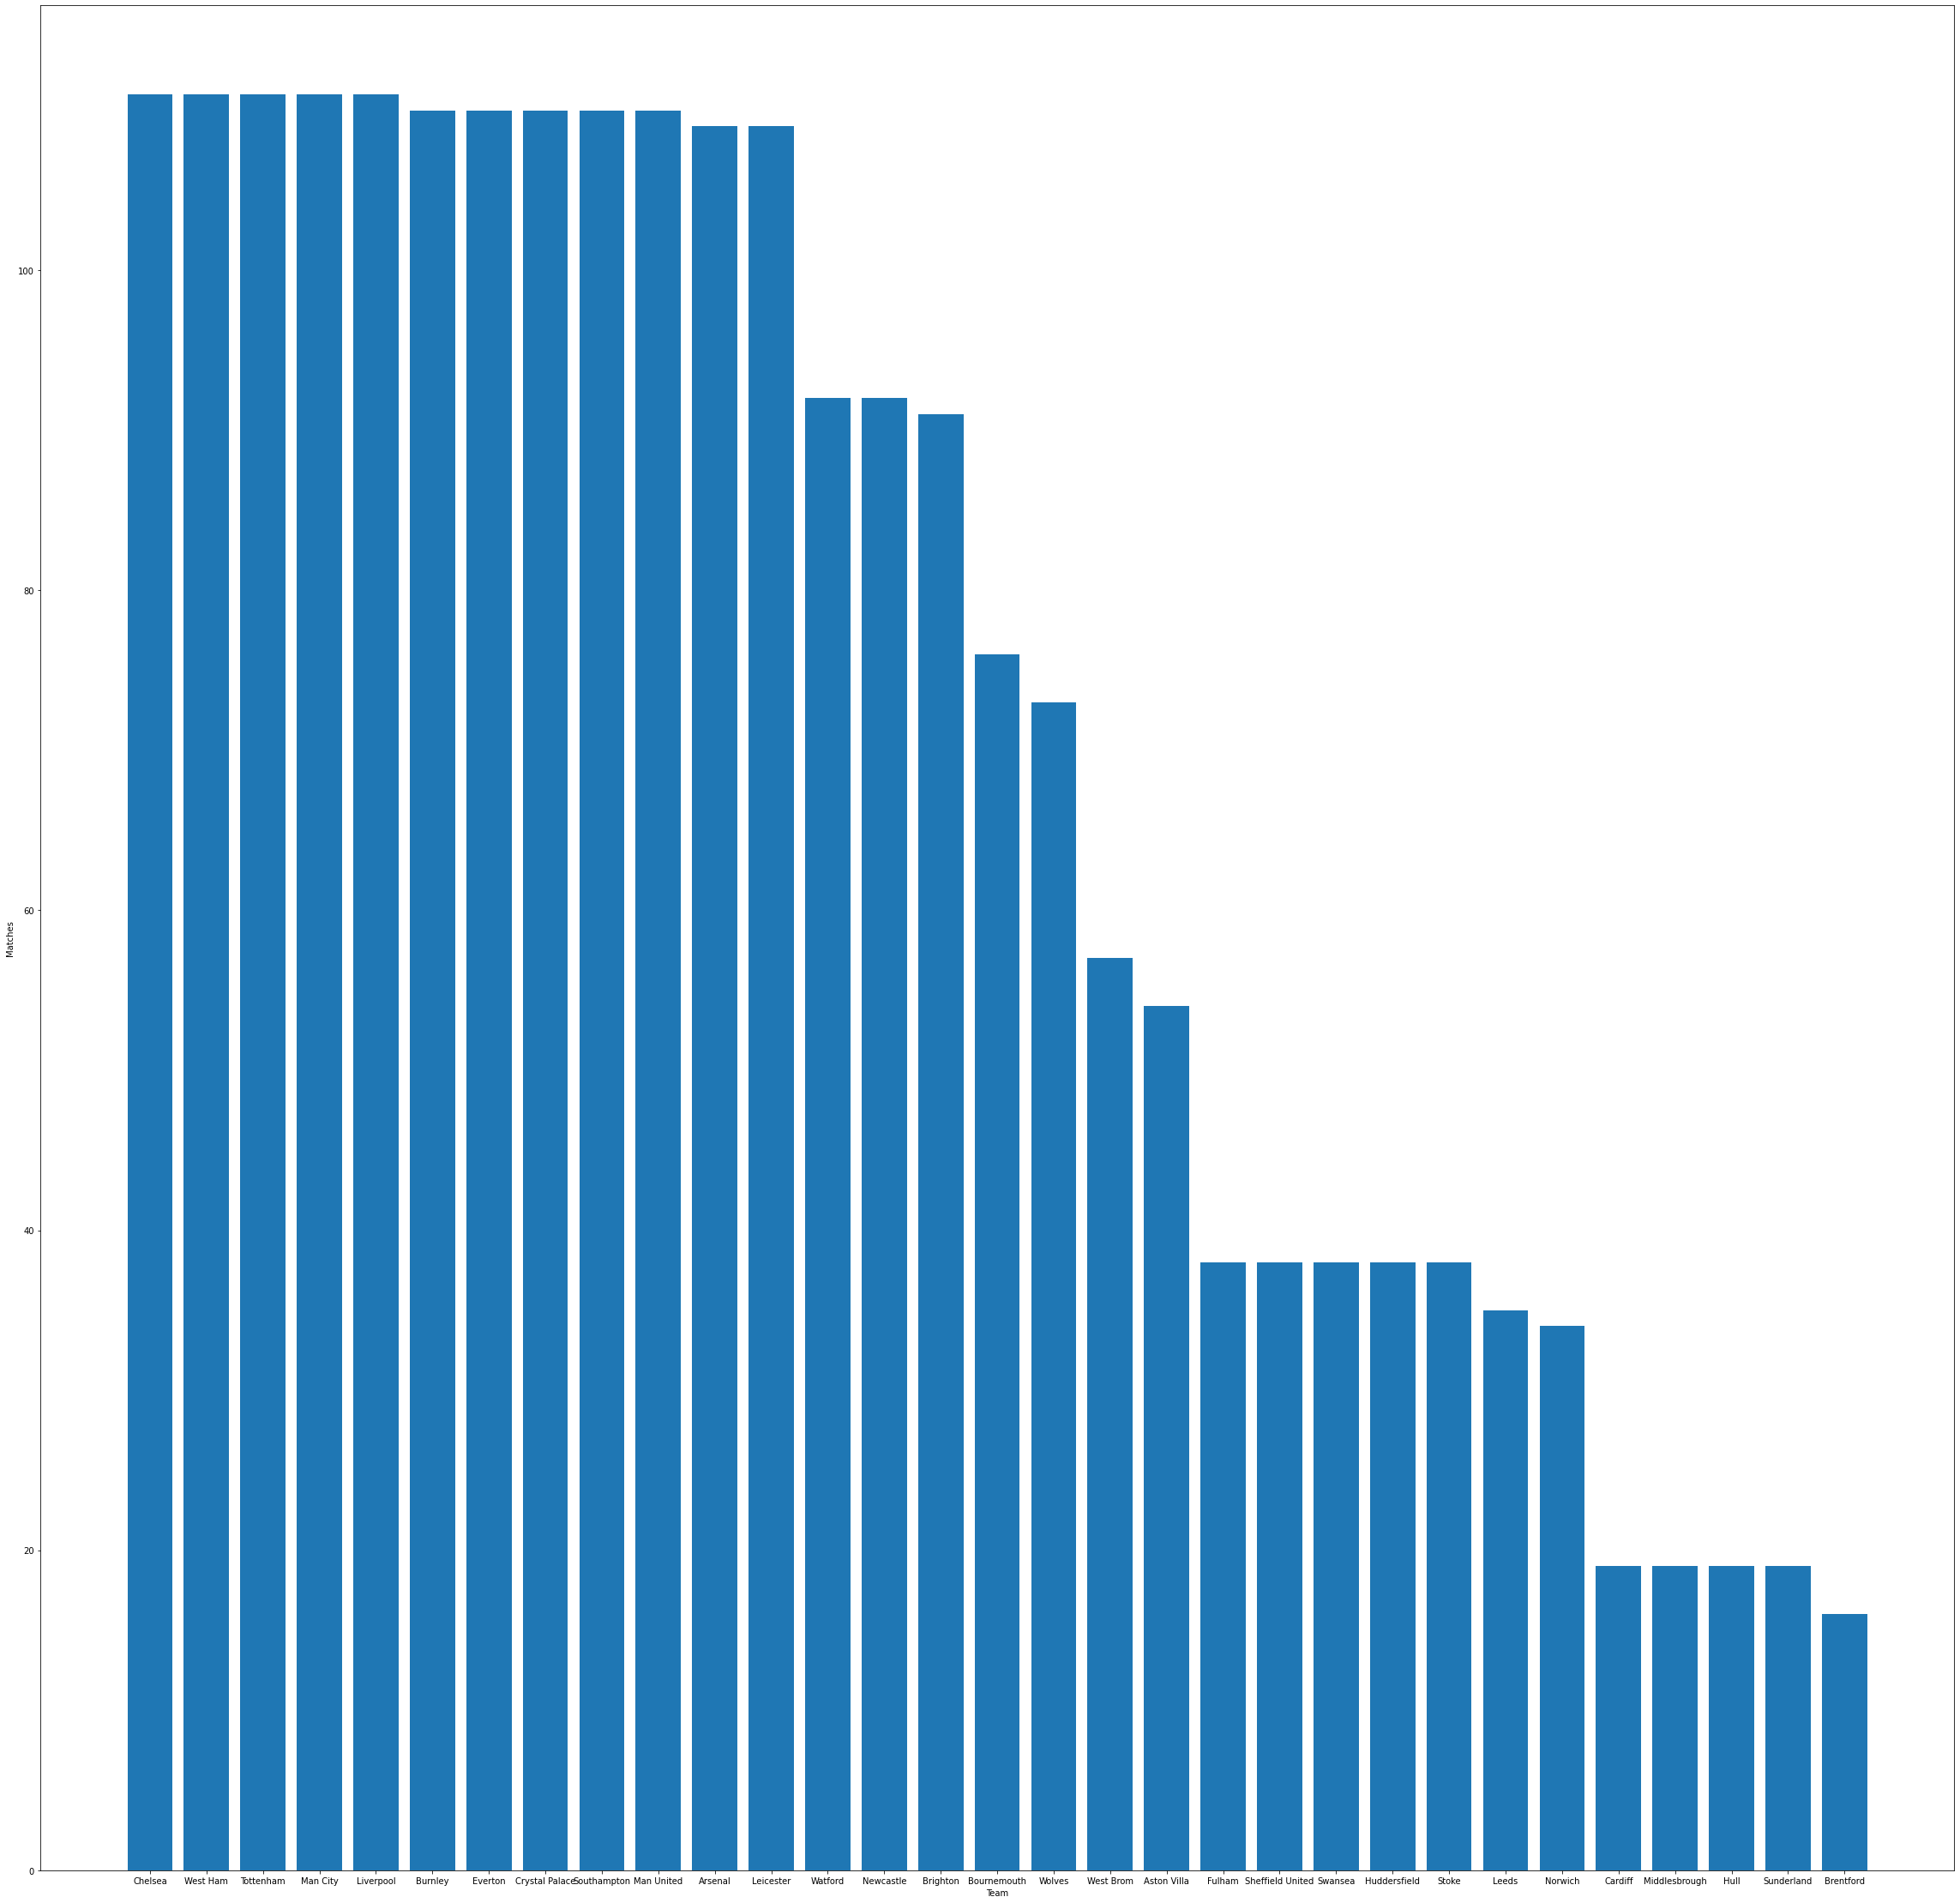

In [54]:
fig,ax=plt.subplots(figsize=(40, 40))
Team_away=data['AwayTeam'].value_counts()

Index_away=Team_away.index
Resuls_away=Team_away.values


ax.bar(Index_away,Resuls_away)

#ax.set_xlabel('Result')
#ax.set_ylabel('Index')
#plt.hist(Team_home,bins=30)
#plt.hist(Team_away,bins=30)

ax.set_xlabel("Team")
ax.set_ylabel("Matches")


In [55]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['FTR'])
one_hot_encoded_data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AC,HF,AF,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H
8904,2016-17,2016-08-13T00:00:00Z,Burnley,Swansea,0,1,0.0,0.0,D,J Moss,...,4.0,10.0,14.0,3.0,2.0,0.0,0.0,1,0,0
8905,2016-17,2016-08-13T00:00:00Z,Crystal Palace,West Brom,0,1,0.0,0.0,D,C Pawson,...,6.0,12.0,15.0,2.0,2.0,0.0,0.0,1,0,0
8906,2016-17,2016-08-13T00:00:00Z,Everton,Tottenham,1,1,1.0,0.0,H,M Atkinson,...,6.0,10.0,14.0,0.0,0.0,0.0,0.0,0,1,0
8907,2016-17,2016-08-13T00:00:00Z,Hull,Leicester,2,1,1.0,0.0,H,M Dean,...,3.0,8.0,17.0,2.0,2.0,0.0,0.0,0,0,1
8908,2016-17,2016-08-13T00:00:00Z,Man City,Sunderland,2,1,1.0,0.0,H,R Madley,...,6.0,11.0,14.0,1.0,2.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,0.0,1.0,A,G Scott,...,3.0,12.0,14.0,2.0,3.0,0.0,0.0,1,0,0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,0.0,0.0,D,M Atkinson,...,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0,0,1
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,2.0,0.0,H,R Jones,...,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0,0,1
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,1.0,0.0,H,M Oliver,...,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0,0,1


In [56]:
one_hot_encoded_data_numeric=one_hot_encoded_data.drop(['Season','DateTime','HomeTeam','AwayTeam'],axis=1)
one_hot_encoded_data_numeric

,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,...,AC,HF,AF,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H
8904,0,1,0.0,0.0,D,J Moss,10.0,17.0,3.0,9.0,...,4.0,10.0,14.0,3.0,2.0,0.0,0.0,1,0,0
8905,0,1,0.0,0.0,D,C Pawson,14.0,13.0,4.0,3.0,...,6.0,12.0,15.0,2.0,2.0,0.0,0.0,1,0,0
8906,1,1,1.0,0.0,H,M Atkinson,12.0,13.0,6.0,4.0,...,6.0,10.0,14.0,0.0,0.0,0.0,0.0,0,1,0
8907,2,1,1.0,0.0,H,M Dean,14.0,18.0,5.0,5.0,...,3.0,8.0,17.0,2.0,2.0,0.0,0.0,0,0,1
8908,2,1,1.0,0.0,H,R Madley,16.0,7.0,4.0,3.0,...,6.0,11.0,14.0,1.0,2.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0,4,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,...,3.0,12.0,14.0,2.0,3.0,0.0,0.0,1,0,0
11109,2,0,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,...,6.0,2.0,6.0,0.0,1.0,0.0,0.0,0,0,1
11110,2,1,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,...,4.0,11.0,12.0,1.0,1.0,0.0,0.0,0,0,1
11111,2,0,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,...,7.0,12.0,10.0,1.0,1.0,0.0,0.0,0,0,1


In [57]:
columns=one_hot_encoded_data_numeric.drop(['FTR_A','FTR_D','FTR_H','Referee'],axis=1)
columns

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8904,0,1,0.0,0.0,D,10.0,17.0,3.0,9.0,7.0,4.0,10.0,14.0,3.0,2.0,0.0,0.0
8905,0,1,0.0,0.0,D,14.0,13.0,4.0,3.0,3.0,6.0,12.0,15.0,2.0,2.0,0.0,0.0
8906,1,1,1.0,0.0,H,12.0,13.0,6.0,4.0,5.0,6.0,10.0,14.0,0.0,0.0,0.0,0.0
8907,2,1,1.0,0.0,H,14.0,18.0,5.0,5.0,5.0,3.0,8.0,17.0,2.0,2.0,0.0,0.0
8908,2,1,1.0,0.0,H,16.0,7.0,4.0,3.0,9.0,6.0,11.0,14.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0,4,0.0,1.0,A,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2,0,0.0,0.0,D,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2,1,2.0,0.0,H,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2,0,1.0,0.0,H,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


In [58]:
c2=pd.DataFrame(columns)
c3=c2.columns
c3

Index(['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC',
       'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [59]:
droped=data.drop(['Season','DateTime','HomeTeam','AwayTeam'],axis=1)
droped

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8904,0,1,A,0.0,0.0,D,J Moss,10.0,17.0,3.0,9.0,7.0,4.0,10.0,14.0,3.0,2.0,0.0,0.0
8905,0,1,A,0.0,0.0,D,C Pawson,14.0,13.0,4.0,3.0,3.0,6.0,12.0,15.0,2.0,2.0,0.0,0.0
8906,1,1,D,1.0,0.0,H,M Atkinson,12.0,13.0,6.0,4.0,5.0,6.0,10.0,14.0,0.0,0.0,0.0,0.0
8907,2,1,H,1.0,0.0,H,M Dean,14.0,18.0,5.0,5.0,5.0,3.0,8.0,17.0,2.0,2.0,0.0,0.0
8908,2,1,H,1.0,0.0,H,R Madley,16.0,7.0,4.0,3.0,9.0,6.0,11.0,14.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


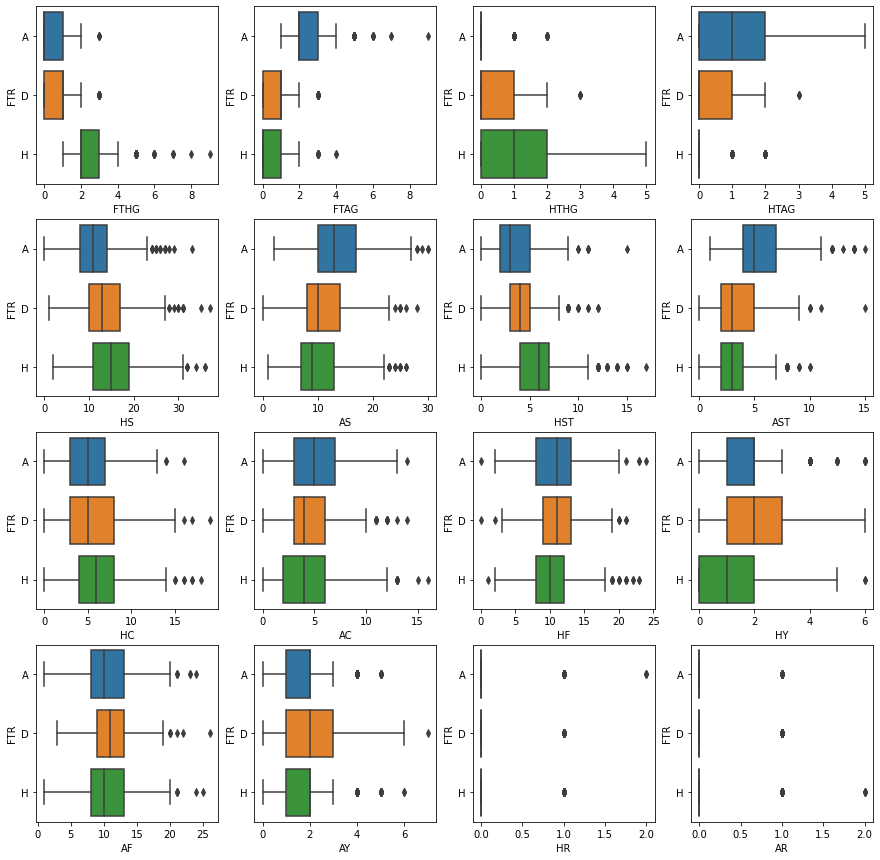

In [60]:
#for column in enumerate(columns):
#ax=fig.add_axes([0, 0, 1, 1])
f, axes = plt.subplots(4,4,figsize=(15, 15))
#box_coded=one_hot_encoded_data_numeric[["FTR_A","FTR_D","FTR_H"]]
#box_coded_1=[columns['FTHG'],data['FTR']]
#box_coded

#box_data=[columns,one_hot_encoded_data_numeric["FTR_A"]]
#bp =ax.boxplot(box_coded_1)
#plt.show()
#sns.boxplot(x=columns['FTAG'],y=data['FTR'])
#sns.boxplot(x=columns['FTAG'],y=data['FTR'])
i=1
#for name in (columns):
  #sns.boxplot(x="FTHG",y="FTR", ax=axes[i])
  #i+=1
#plt.tight_layout()
sns.boxplot(x=columns['FTHG'],y=data['FTR'], ax=axes[0][0])
sns.boxplot(x=columns['FTAG'],y=data['FTR'], ax=axes[0][1])
sns.boxplot(x=columns['HTHG'],y=data['FTR'], ax=axes[0][2])
sns.boxplot(x=columns['HTAG'],y=data['FTR'], ax=axes[0][3])
sns.boxplot(x=columns['HS'],y=data['FTR'], ax=axes[1][0])
sns.boxplot(x=columns['AS'],y=data['FTR'], ax=axes[1][1])
sns.boxplot(x=columns['HST'],y=data['FTR'], ax=axes[1][2])
sns.boxplot(x=columns['AST'],y=data['FTR'], ax=axes[1][3])
sns.boxplot(x=columns['HC'],y=data['FTR'], ax=axes[2][0])
sns.boxplot(x=columns['AC'],y=data['FTR'], ax=axes[2][1])
sns.boxplot(x=columns['HF'],y=data['FTR'], ax=axes[2][2])
sns.boxplot(x=columns['HY'],y=data['FTR'], ax=axes[2][3])
sns.boxplot(x=columns['AF'],y=data['FTR'], ax=axes[3][0])
sns.boxplot(x=columns['AY'],y=data['FTR'], ax=axes[3][1])
sns.boxplot(x=columns['HR'],y=data['FTR'], ax=axes[3][2])
sns.boxplot(x=columns['AR'],y=data['FTR'], ax=axes[3][3])

#ax.boxplot(x=columns['HTHG'],y=data['FTR'])

#sns.boxplot(x=columns[["FTHG","FTAG","HTHG"	,"HTAG"	,"HTR",	"HS","AS","HST","AST","HC","AC","HF","AF","HY","AY","HR","AR"]],y=data['FTR'])

In [61]:
# 0000000000000000000000000000000000000000000000000000000


data_copy=data.copy()
data_copy.drop('Referee', axis=1, inplace=True)
data_copy.head()


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
8904,2016-17,2016-08-13T00:00:00Z,Burnley,Swansea,0,1,A,0.0,0.0,D,...,3.0,9.0,7.0,4.0,10.0,14.0,3.0,2.0,0.0,0.0
8905,2016-17,2016-08-13T00:00:00Z,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,...,4.0,3.0,3.0,6.0,12.0,15.0,2.0,2.0,0.0,0.0
8906,2016-17,2016-08-13T00:00:00Z,Everton,Tottenham,1,1,D,1.0,0.0,H,...,6.0,4.0,5.0,6.0,10.0,14.0,0.0,0.0,0.0,0.0
8907,2016-17,2016-08-13T00:00:00Z,Hull,Leicester,2,1,H,1.0,0.0,H,...,5.0,5.0,5.0,3.0,8.0,17.0,2.0,2.0,0.0,0.0
8908,2016-17,2016-08-13T00:00:00Z,Man City,Sunderland,2,1,H,1.0,0.0,H,...,4.0,3.0,9.0,6.0,11.0,14.0,1.0,2.0,0.0,0.0


In [62]:
data_copy["matchDate"] = pd.to_datetime(data_copy["DateTime"], infer_datetime_format=True)
data_copy['matchDay'] = data_copy['matchDate'].dt.day_name()
print(data_copy["matchDate"][8904])
print(data_copy['matchDay'][9052])
data_copy.drop('DateTime', axis=1, inplace=True)
data_copy.drop('matchDate', axis=1, inplace=True)
data_copy.head()

2016-08-13 00:00:00
Sunday


,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,AST,HC,AC,HF,AF,HY,AY,HR,AR,matchDay
8904,2016-17,Burnley,Swansea,0,1,A,0.0,0.0,D,10.0,...,9.0,7.0,4.0,10.0,14.0,3.0,2.0,0.0,0.0,Saturday
8905,2016-17,Crystal Palace,West Brom,0,1,A,0.0,0.0,D,14.0,...,3.0,3.0,6.0,12.0,15.0,2.0,2.0,0.0,0.0,Saturday
8906,2016-17,Everton,Tottenham,1,1,D,1.0,0.0,H,12.0,...,4.0,5.0,6.0,10.0,14.0,0.0,0.0,0.0,0.0,Saturday
8907,2016-17,Hull,Leicester,2,1,H,1.0,0.0,H,14.0,...,5.0,5.0,3.0,8.0,17.0,2.0,2.0,0.0,0.0,Saturday
8908,2016-17,Man City,Sunderland,2,1,H,1.0,0.0,H,16.0,...,3.0,9.0,6.0,11.0,14.0,1.0,2.0,0.0,0.0,Saturday


In [63]:
data_copy = pd.get_dummies(data_copy, columns = ['HomeTeam'])
data_copy = pd.get_dummies(data_copy, columns = ['AwayTeam'])
data_copy = pd.get_dummies(data_copy, columns = ['HTR'])
data_copy = pd.get_dummies(data_copy, columns = ['matchDay'])
data_copy.head()

,Season,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,...,HTR_A,HTR_D,HTR_H,matchDay_Friday,matchDay_Monday,matchDay_Saturday,matchDay_Sunday,matchDay_Thursday,matchDay_Tuesday,matchDay_Wednesday
8904,2016-17,0,1,A,0.0,0.0,10.0,17.0,3.0,9.0,...,0,1,0,0,0,1,0,0,0,0
8905,2016-17,0,1,A,0.0,0.0,14.0,13.0,4.0,3.0,...,0,1,0,0,0,1,0,0,0,0
8906,2016-17,1,1,D,1.0,0.0,12.0,13.0,6.0,4.0,...,0,0,1,0,0,1,0,0,0,0
8907,2016-17,2,1,H,1.0,0.0,14.0,18.0,5.0,5.0,...,0,0,1,0,0,1,0,0,0,0
8908,2016-17,2,1,H,1.0,0.0,16.0,7.0,4.0,3.0,...,0,0,1,0,0,1,0,0,0,0


In [64]:
data_copy['HomeTeam_Arsenal']

8904     0
8905     0
8906     0
8907     0
8908     0
        ..
11108    0
11109    0
11110    0
11111    0
11112    0
Name: HomeTeam_Arsenal, Length: 2209, dtype: uint8

In [65]:
label_encoder = LabelEncoder()
data_copy['FTR']=label_encoder.fit_transform(data_copy['FTR'])

In [66]:
unique_values=[]
for i in (data_copy['FTR']):
  if (i not in unique_values):
    unique_values.append(i)
print(unique_values)

[0, 1, 2]


In [67]:
label_encoder = LabelEncoder()
data_copy['FTR']= label_encoder.fit_transform(data_copy['FTR'])
print('Unique values: ', data_copy['FTR'].unique())
print('home team wins ', unique_values[2])
print('away team wins', unique_values[0])
print('tie', unique_values[1])
label = data_copy['FTR']
print('the result for the match in row 9052 is ', label[9052])
print(data_copy.iloc[:,4:90])
features = data_copy.iloc[:,4:90]

Unique values:  [0 1 2]
home team wins  2
away team wins 0
tie 1
the result for the match in row 9052 is  2
       HTHG  HTAG    HS    AS  HST  AST   HC   AC    HF    AF  ...  HTR_A  \
8904    0.0   0.0  10.0  17.0  3.0  9.0  7.0  4.0  10.0  14.0  ...      0   
8905    0.0   0.0  14.0  13.0  4.0  3.0  3.0  6.0  12.0  15.0  ...      0   
8906    1.0   0.0  12.0  13.0  6.0  4.0  5.0  6.0  10.0  14.0  ...      0   
8907    1.0   0.0  14.0  18.0  5.0  5.0  5.0  3.0   8.0  17.0  ...      0   
8908    1.0   0.0  16.0   7.0  4.0  3.0  9.0  6.0  11.0  14.0  ...      0   
...     ...   ...   ...   ...  ...  ...  ...  ...   ...   ...  ...    ...   
11108   0.0   1.0   9.0  11.0  8.0  5.0  9.0  3.0  12.0  14.0  ...      1   
11109   0.0   0.0  15.0   5.0  7.0  1.0  4.0  6.0   2.0   6.0  ...      0   
11110   2.0   0.0  12.0  11.0  3.0  3.0  3.0  4.0  11.0  12.0  ...      0   
11111   1.0   0.0  17.0  18.0  6.0  4.0  6.0  7.0  12.0  10.0  ...      0   
11112   2.0   1.0  11.0   6.0  5.0  4.0  4.0 

In [68]:
data_copy

,Season,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,...,HTR_A,HTR_D,HTR_H,matchDay_Friday,matchDay_Monday,matchDay_Saturday,matchDay_Sunday,matchDay_Thursday,matchDay_Tuesday,matchDay_Wednesday
8904,2016-17,0,1,0,0.0,0.0,10.0,17.0,3.0,9.0,...,0,1,0,0,0,1,0,0,0,0
8905,2016-17,0,1,0,0.0,0.0,14.0,13.0,4.0,3.0,...,0,1,0,0,0,1,0,0,0,0
8906,2016-17,1,1,1,1.0,0.0,12.0,13.0,6.0,4.0,...,0,0,1,0,0,1,0,0,0,0
8907,2016-17,2,1,2,1.0,0.0,14.0,18.0,5.0,5.0,...,0,0,1,0,0,1,0,0,0,0
8908,2016-17,2,1,2,1.0,0.0,16.0,7.0,4.0,3.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,0,4,0,0.0,1.0,9.0,11.0,8.0,5.0,...,1,0,0,0,0,1,0,0,0,0
11109,2021-22,2,0,2,0.0,0.0,15.0,5.0,7.0,1.0,...,0,1,0,0,0,0,1,0,0,0
11110,2021-22,2,1,2,2.0,0.0,12.0,11.0,3.0,3.0,...,0,0,1,0,0,0,1,0,0,0
11111,2021-22,2,0,2,1.0,0.0,17.0,18.0,6.0,4.0,...,0,0,1,0,0,0,1,0,0,0


In [69]:
data_copy['FTR']

8904     0
8905     0
8906     1
8907     2
8908     2
        ..
11108    0
11109    2
11110    2
11111    2
11112    1
Name: FTR, Length: 2209, dtype: int64

In [70]:
################# MODEL ########################################################
# using keras to build the deep learning model. 
# which will use tensorflow as the backend by default
# sequential --> module to initialize the artificial neural network.
# dense --> module add layers to the deep learning model

In [71]:
# installing keras and tensorflow 

#!pip install tensorflow keras


In [72]:
# separating data to trainig and testing datasets 

from sklearn.model_selection import train_test_split

# train -> features = data_copy.iloc[:,4:90]
# make it numpy array so the keras model accept it by using " .values "
X = features.values

# target -> label = data_copy['FTR']
# make it numpy array so the keras model accept it by using " .values "
y = label.values

# split the data train and test for the target and the features 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [73]:
# transforming the data 

# we will scale our data to the same range be more computationally efficient.
# by making the dataset normally distributed 
# we need this step because the features have different measurements

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
# Build Artificical neural network 

# we will use three layers types:
# input layer --> it will take the features of the data set.
# hidden layers --> can be more than one and preform the computations.
# output layer --> the layer of the neural network which will give us the results.

import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
# adding layers 
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim=86))
# output layer 
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
# apply a gradient descent
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
# fit the classifier 
classifier.fit(X_train, y_train, batch_size = 10, epochs = 1)


155/155 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.2160


In [90]:
#y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)
y_pred = np.argmax(classifier.predict(X_test), axis=-1)



21/21 [==============================] - 0s 1ms/step


In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[195,   0,   0],
       [170,   0,   0],
       [298,   0,   0]])

In [77]:
# for the 

# TP = 226

# FN = 0

# FP = 150 + 287 = 437

# TN = 0 + 0 + 0 + 0 = 0



In [93]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))


0.29411764705882354


In [82]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def make_classifier():
    classifier = Sequential()
    classifier.add(Dense(6, kernel_initializer = "uniform", activation = "relu", input_dim=86))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier


classifier = KerasClassifier(build_fn = make_classifier, batch_size=10, nb_epoch=1)

accuracies = cross_val_score(estimator = classifier,X = X_train,y = y_train,cv = 10,n_jobs = -1)



<ipython-input-82-c2fc33dd08bf>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = make_classifier, batch_size=10, nb_epoch=1)


In [83]:
mean = accuracies.mean()
mean

0.21410557329654695

In [81]:
variance = accuracies.var()
variance

0.0007079633563610721

In [95]:
#Xnew = classifier.predict(sc.transform( np.array([[1, 0, 1, 0, 0, 0,1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]) )

SyntaxError: ignored